In [1]:
!pip install pandas matplotlib scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Galaxies.csv to Galaxies.csv


In [5]:
data = pd.read_csv('Galaxies.csv')

In [6]:
print(data.head())

  Catalog            RA           DEC Type       Name    Magn. Unnamed: 6  \
0     PGC  12h43m38.09s  +27°10'49.1"   Gx   UGC07877  m:16.20  PGC:42726   
1     PGC  12h43m39.59s  +26°32'53.0"   Gx  PGC042722  m:15.36  PGC:42722   
2     PGC  12h46m07.88s  +27°02'02.7"   Gx    NGC4670  m:13.16  PGC:42987   
3     PGC  12h46m25.45s  +26°58'10.2"   Gx    NGC4673  m:14.89  PGC:43008   
4     PGC  12h47m34.96s  +29°38'39.5"   Gx     IC0818  m:15.18  PGC:43113   

         Unnamed: 7 Unnamed: 8 Unnamed: 9  Unnamed: 10  
0  Dim: 1.0 x 0.2 '     pa: 64   rv: 5908          NaN  
1  Dim: 0.9 x 0.3 '     pa: 17   rv: 6639          NaN  
2  Dim: 1.0 x 0.8 '     pa: 94   rv: 1085          NaN  
3  Dim: 1.1 x 0.8 '     pa:171   rv: 6814          NaN  
4  Dim: 0.9 x 0.3 '     pa: 46   rv: 4666          NaN  


In [7]:
data.describe()

,Unnamed: 10
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Catalog      96 non-null     object 
 1   RA           96 non-null     object 
 2   DEC          96 non-null     object 
 3   Type         96 non-null     object 
 4   Name         96 non-null     object 
 5   Magn.        96 non-null     object 
 6   Unnamed: 6   96 non-null     object 
 7   Unnamed: 7   96 non-null     object 
 8   Unnamed: 8   96 non-null     object 
 9   Unnamed: 9   96 non-null     object 
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(1), object(10)
memory usage: 8.4+ KB


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data.fillna(data.mean(), inplace=True)

In [14]:
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like median or most_frequent
data_imputed = imputer.fit_transform(data)


In [15]:
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)


In [18]:
pca = PCA(n_components=2)  # Choose the number of components as needed
data_pca = pca.fit_transform(data_scaled)

In [19]:
gmm = GaussianMixture(n_components=5, random_state=42)
clusters = gmm.fit_predict(data_pca)

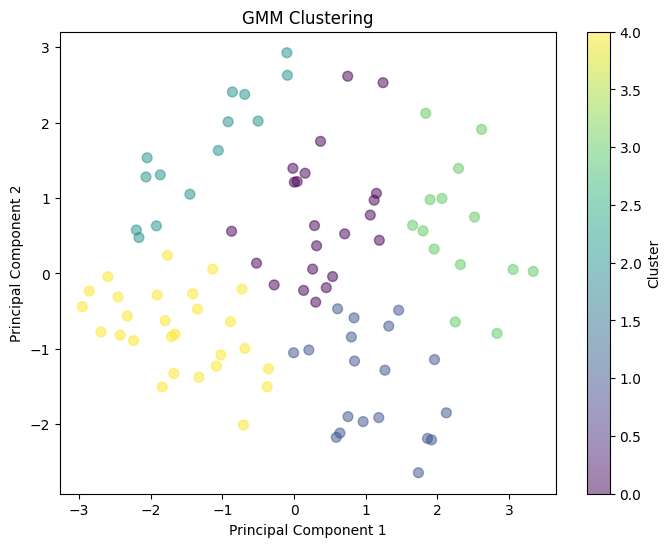

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.title('GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Silhouette Score: 0.37363134815543536


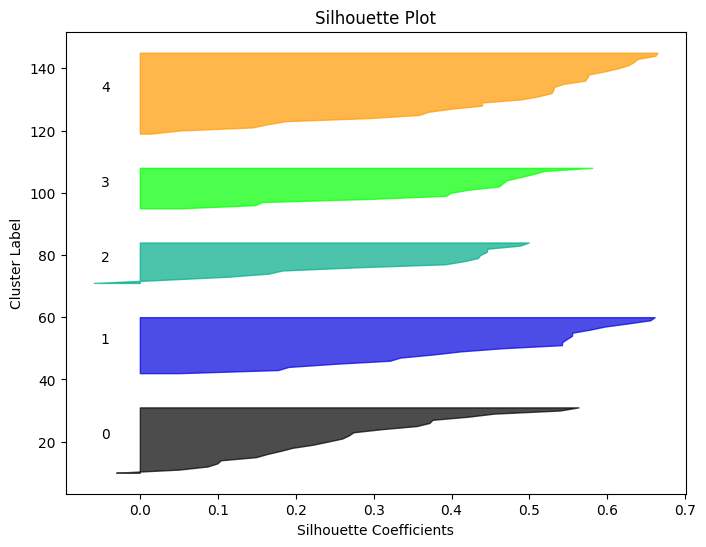

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np;

# Calculate silhouette score
silhouette_avg = silhouette_score(data_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Create silhouette plot
plt.figure(figsize=(8, 6))
sample_silhouette_values = silhouette_samples(data_pca, clusters)
y_lower = 10
for i in range(len(set(clusters))):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / len(set(clusters)))
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficients')
plt.ylabel('Cluster Label')
plt.show()

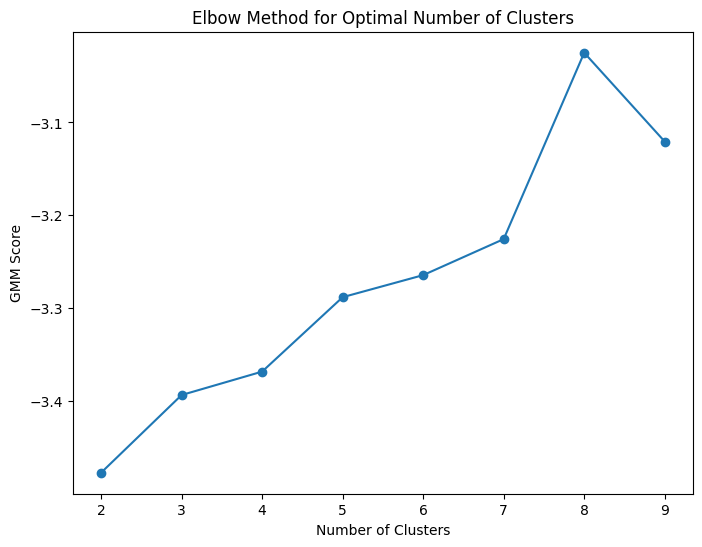

In [23]:
# Elbow method to determine optimal number of clusters
n_clusters = range(2, 10)
scores = []
for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(data_pca)
    scores.append(gmm.score(data_pca))

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(n_clusters, scores, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('GMM Score')
plt.show()


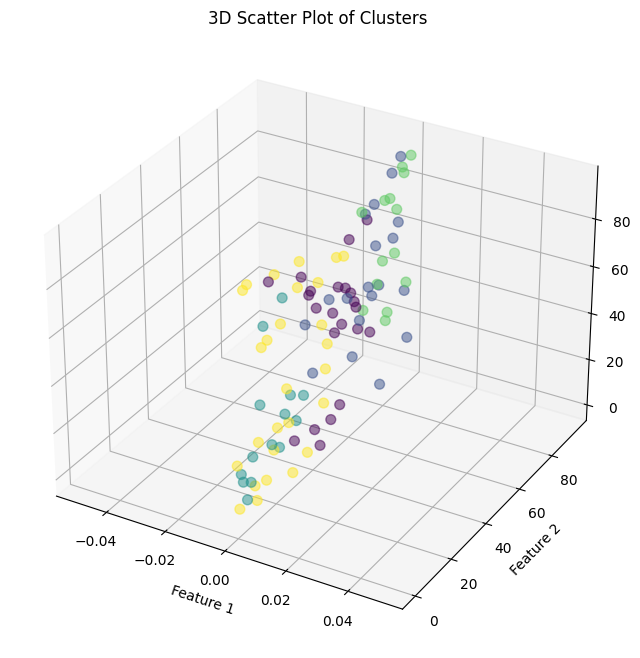

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=clusters, cmap='viridis', s=50, alpha=0.5)
ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()


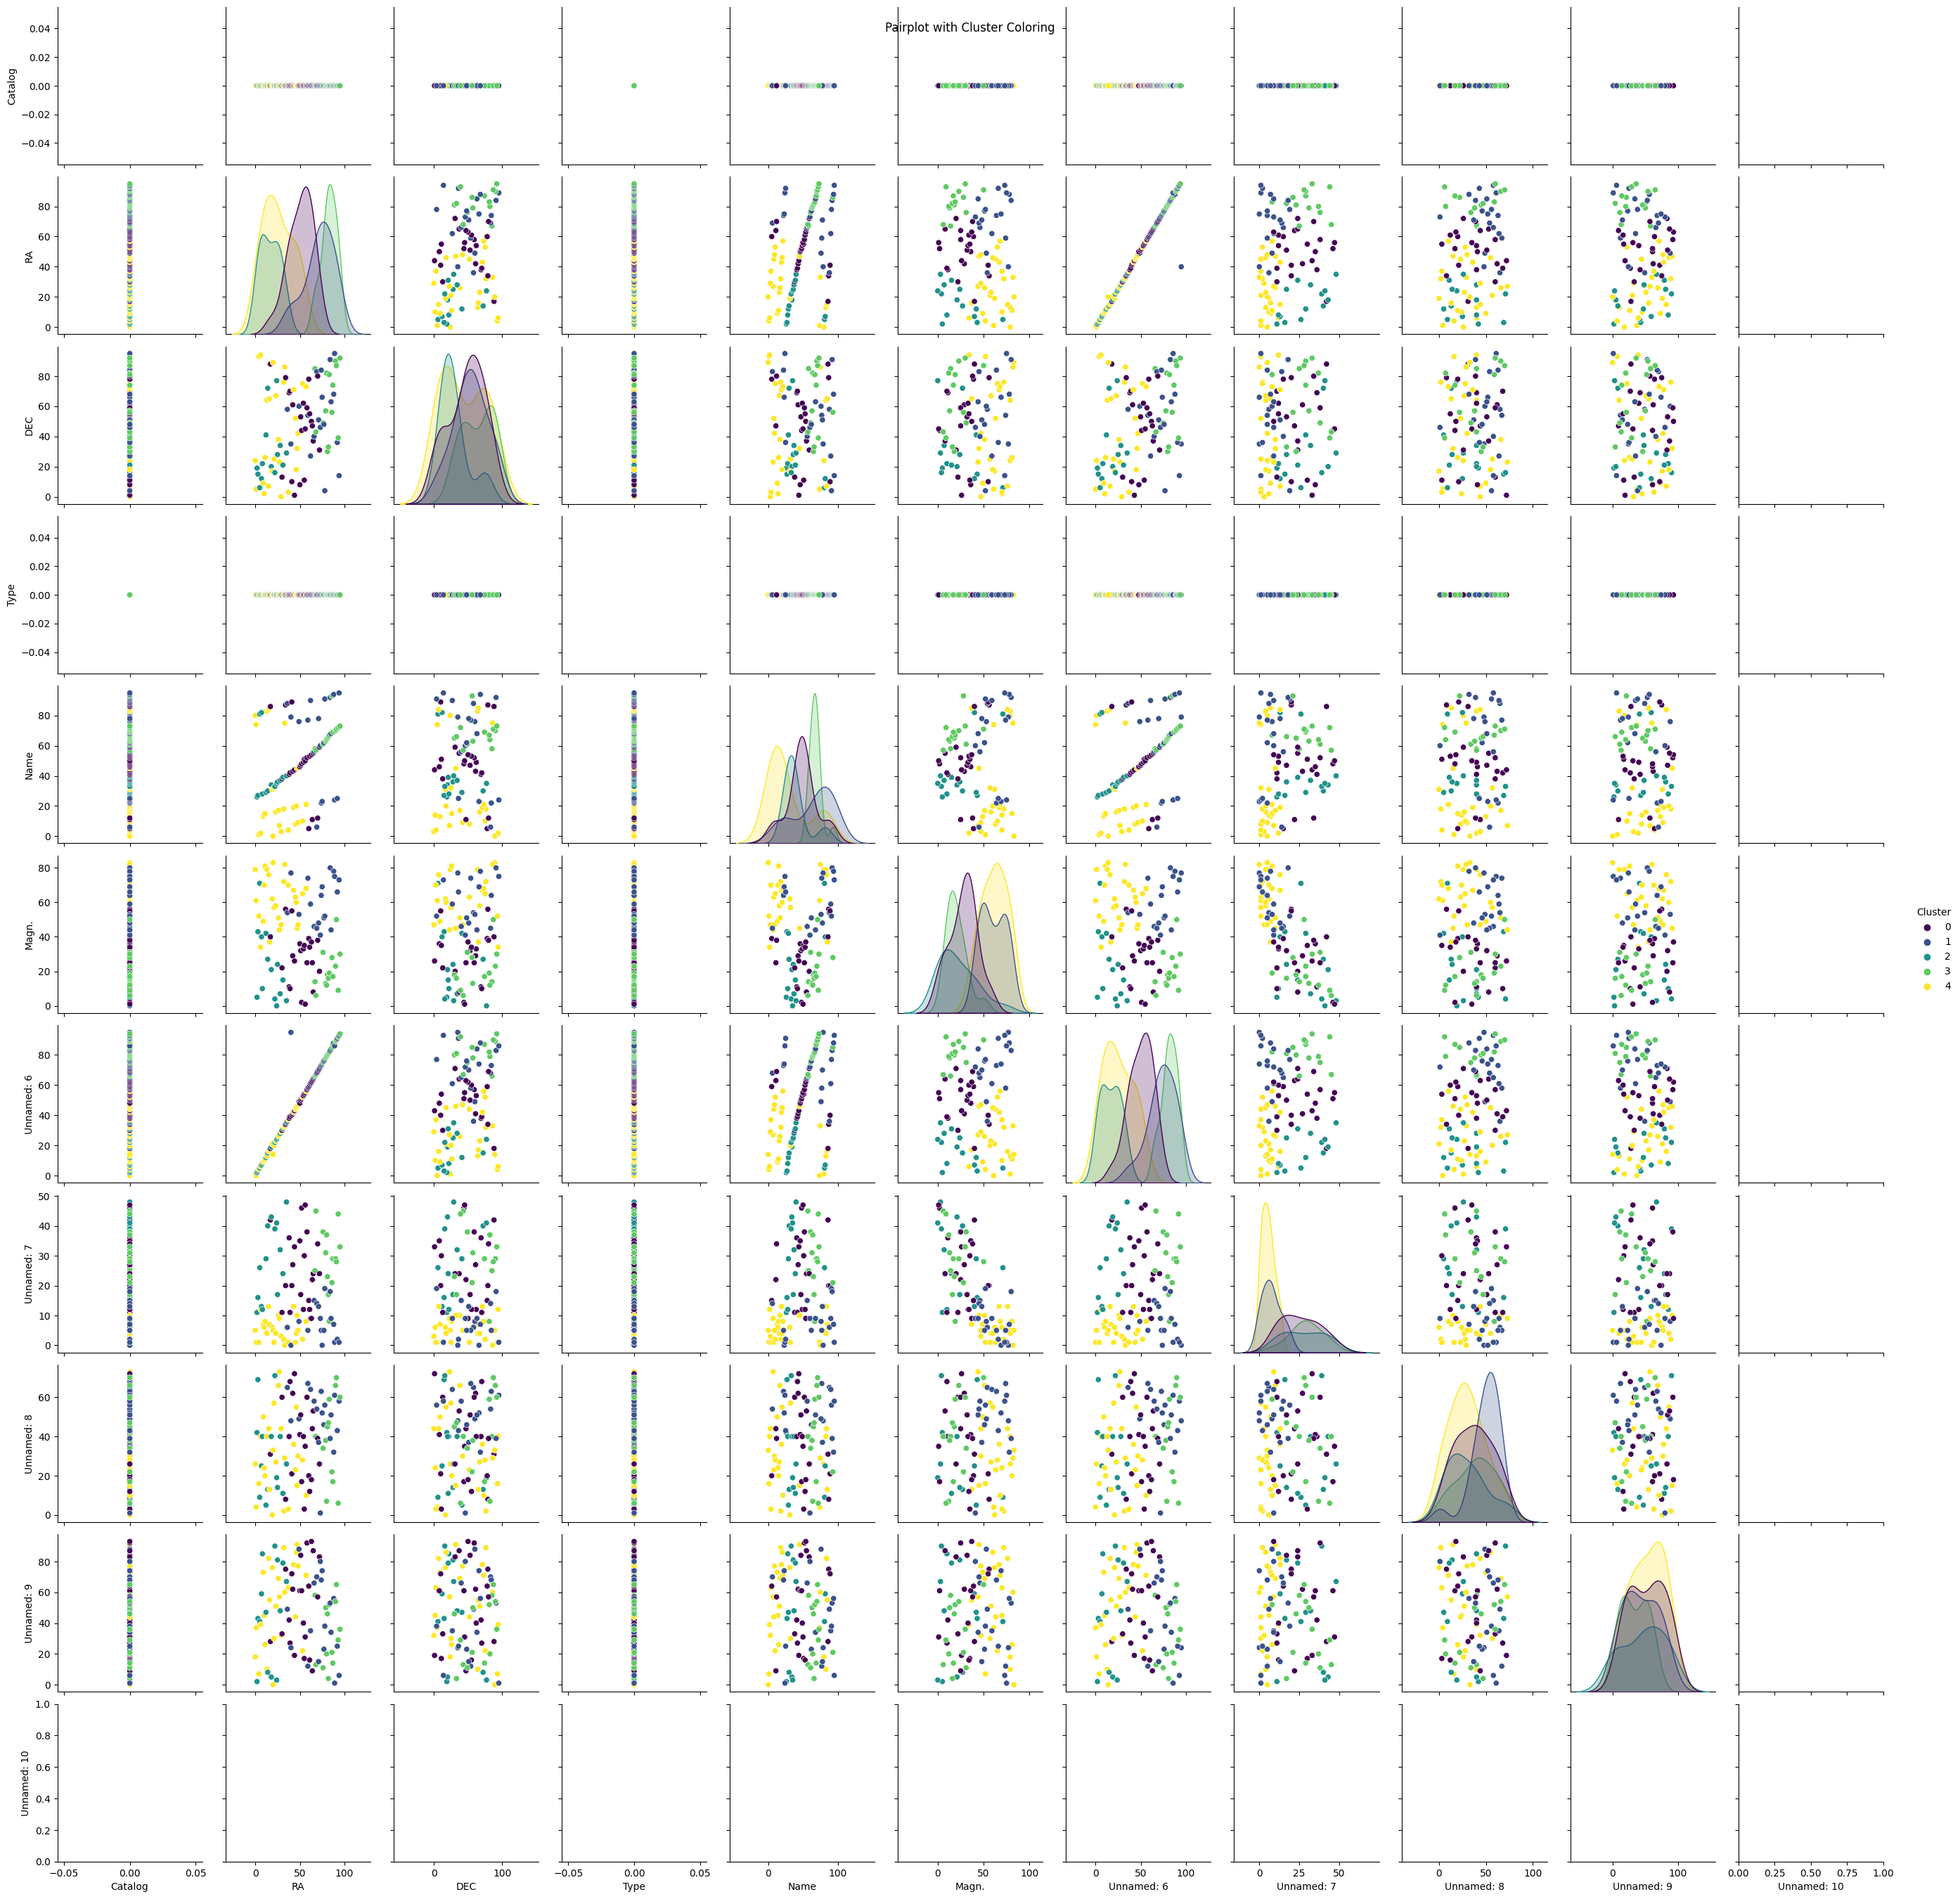

In [25]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters

# Create pairplot
sns.pairplot(data_with_clusters, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot with Cluster Coloring')
plt.show()
